# **MSCI446 Final Project**
### Sentiment Analysis of Women in Sports 🏀

*Yashvi Parmar, Anna Fyfe, Bharavi Thalayasingam, Aamina Anjum*

Steps to get started:
1. Download the uncleanedData.csv file
https://docs.google.com/spreadsheets/d/1wtJB97TbU8JAN_nOqH8qBYZ-Xy2Rms8dif5KSv_vrSc/edit?usp=sharing
2. Download the afinn-111.txt file
https://drive.google.com/file/d/1iplzNIEZ27-3gQNmOQq_tG23FmvfxJhg/view?usp=share_link
3. Place both files in the files section on the left

#Introduction

###Business Problem and Motivation

The general goal of this project is to assess bias and sentiment towards women versus men in sports. We’ve noticed a difference in how female athletes are described in the media, compared to male athletes. A recent example is the Canadian Women’s Soccer team receiving a significant funding cut, mere months before the Women’s Soccer World Cup. Keeping in mind, the women had just won Olympic Gold in 2020. In a 2015 study published in the American Sociological Review, authors describe a “Paper Ceiling” in news coverage of women, where women are written less about in the news compared to men. The study investigated why this was the case, but did not consider how the women were spoken about in the coverage. Another example is The New York Times describing Serena Williams’s playing style as aggressive and intimidating. This prompted online discussion around sexism/racism in sports and if a male tennis player would be described with similar words (for context, tennis is a very physically demanding sport that is intrinsically aggressive). This, along with other experiences has sparked our research into determining varying words/sentiments in sports media.


Representation in sports matters, and more young female athletes are encouraged to pursue professional sports in North America if they feel like they belong. By increasing positive media coverage of women’s sports, this will likely bring more viewers, and more revenue to these sports. Our research will also help dig further into why major women sports leagues like the WNBA are less popular compared to the NBA in North America. By assessing if sentiment in coverage is different, this may help change the way women’s sports leagues choose to market themselves.




#Data Description

In [ ]:
#@title Installations for Project
!pip install -U textblob
!python -m textblob.download_corpora
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install vaderSentiment
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error,f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.2 MB/s eta 0:00:00


##Data Introduction
The data we selected to run through the models chosen above we collected them from various sports news websites. For example, we collected articles from National Post, ESPN, TSN, "The Ringer", ABC, "The Score", "VolleyBall Mag" among others. The articles also covered a variety of sports, such as volleyball, basketball, and tennis.


Obtain dataset: https://docs.google.com/spreadsheets/d/1wtJB97TbU8JAN_nOqH8qBYZ-Xy2Rms8dif5KSv_vrSc/edit?usp=sharing (download as a csv)

In [ ]:
# Method to collect data - our data was found from online datasets and scraped using the following code

import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

# Example of how 'Five Thirty Eight articles were found
urls = []
# For example purposes the range is set to 1
for i in range(1):
    url = 'https://fivethirtyeight.com/tag/college-basketball/page/'+ str(i) + '/'
    page = requests.get(url).text
    df = pd.DataFrame()
    soup = BeautifulSoup(page)
    links = soup.find_all('a', {"class": "post-thumbnail"})
    p_tags_text = [tag.get('href') for tag in links]
    p_tags_text = p_tags_text[ : -4]

    # Append all urls together
    urls = np.append(p_tags_text, urls)


# Append values to a dataframe
df_main = pd.DataFrame(columns=['Headline','Date','Author','Article','Summary','Word count','Sport', 'League', 'Sex', 'url'])

list_df = list()
# Loop through the urls
for i in range (len(urls)):
    url = urls[i]
    page = requests.get(url).text
    df = pd.DataFrame()
    soup = BeautifulSoup(page)

    # Find headlines
    headline = soup.find('title').get_text()
    df['Headline'] = [headline]

    p_tags = soup.find_all('p')
    p_tags_text = [tag.get_text().strip() for tag in p_tags]

    date_tags = soup.find('time')
    df['Date'] = [date_tags]

    sentence_list = [sentence for sentence in p_tags_text if not '\n' in sentence]
    sentence_list = [sentence for sentence in sentence_list if '.' in sentence]
    article = ' '.join(sentence_list)

    df['Article'] = [article]

    df['Word count'] = [len(article)]
    df['Sport'] = 'Basketball'
    df['League'] = ''
    # Depending on the site we would know if it was M/F
    df['Sex'] = ''
    df['url'] = url

    list_df.append(df)

df_main = pd.concat(list_df)


In [ ]:
# Load csv file
df = pd.read_csv('uncleanedData.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Headline                 1484 non-null   object 
 1   Date Published           1484 non-null   int64  
 2   Website Name (e.g. TSN)  1423 non-null   object 
 3   Article                  1483 non-null   object 
 4   Word count               1484 non-null   int64  
 5   Sport                    1484 non-null   object 
 6   League                   673 non-null    object 
 7   Sex                      1484 non-null   object 
 8   Article URL              1110 non-null   object 
 9   Unnamed: 9               0 non-null      float64
 10  Unnamed: 10              0 non-null      float64
 11  Unnamed: 11              0 non-null      float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14             

None

We will be looking at the articles' headlines to determine their sentiment. Originally we chose to examine the articles but due to long runtimes and our pre-trained models being tested on shorter text, we opted for applying our analysis on headlines only.

# Data Cleaning, Transformation

In [ ]:
# Check for null values
df.isnull().sum()

# Drop rows that are empty in headline column
df = df[df['Headline'].notna()]
df = df[df['Sport'].notna()]

# Remove Duplicates from headline column
df = df.drop_duplicates('Headline')

# Drop rows with word count in article less than 175
df = df[df['Word count'] > 175 ]

# Drop columns not necessary
df = df[['Date Published', 'Website Name (e.g. TSN)', 'Headline', 'Sport', 'Sex']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 481 to 1483
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date Published           995 non-null    int64 
 1   Website Name (e.g. TSN)  934 non-null    object
 2   Headline                 995 non-null    object
 3   Sport                    995 non-null    object
 4   Sex                      995 non-null    object
dtypes: int64(1), object(4)
memory usage: 46.6+ KB


In [ ]:
# Some installations
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#@title Stop Words
stop_words = set(stopwords.words('english'))
stop_words.add('kill')
stop_words.add('blocks')
stop_words.add('block')
stop_words.add('team')
stop_words.add('game')
stop_words.add('kills')
stop_words.add('team')
stop_words.add('play')
stop_words.add('season')
stop_words.add('hit')
stop_words.add('tournament')
stop_words.add('attack')
stop_words.add('digs')
stop_words.add('dig')
stop_words.add('block')
stop_words.add('match')
stop_words.add('league')
stop_words.add('player')
stop_words.add('match')
stop_words.add('games')
stop_words.add('tennis')
stop_words.add('nba')
stop_words.add('volleyball')
stop_words.add('assist')
stop_words.add('coach')
stop_words.add('sport')
stop_words.add('sports')
stop_words.add('year')
stop_words.add('time')
stop_words.add('said')
stop_words.add('one')
stop_words.add('two')
stop_words.add('three')
stop_words.add('four')
stop_words.add('five')
stop_words.add('six')
stop_words.add('seven')
stop_words.add('eight')
stop_words.add('nine')
stop_words.add('first')
stop_words.add('ace')
stop_words.add('wnba')
stop_words.add('ncaa')
stop_words.add('french open')
stop_words.add('south carolina')
stop_words.add('second')
stop_words.add('third')
stop_words.add('went')
stop_words.add('last')
stop_words.add('go')
stop_words.add('point')
stop_words.add('final')
stop_words.add('played')
stop_words.add('playing')
stop_words.add('make')
stop_words.add('fivethirtyeight')
stop_words.add('men')
stop_words.add('women')
stop_words.add('ucla')
stop_words.add('thescore')
stop_words.add('long beach')
stop_words.add('french')
stop_words.add('open')
stop_words.add('coaching')
stop_words.add('tourney')
stop_words.add('penn')
stop_words.add('stanford')
stop_words.add('pepperdine')
stop_words.add('say')
stop_words.add('hawai')
stop_words.add('avca')
stop_words.add('st')
stop_words.add('u')
stop_words.add('com')
stop_words.add('volleyballmag')

In [ ]:
# Empty list to store the cleaned words
cleanList = []
for i in range(0, len(df)):
  # Remove symbols and urls
  data = re.sub('@[^\s]','',df.iloc[i]['Headline'])
  data = re.sub('http[^\s]','',df.iloc[i]['Headline'])
  # Remove characters that aren't english
  data = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['Headline'])
  # Lowercase text
  data = data.lower()
  data = data.split()
  # Lemmatize words
  wl = WordNetLemmatizer()
  data = [wl.lemmatize(word) for word in data if not word in set(stopwords.words('english'))]
  data = ' '.join(data)
  cleanList.append(data)

df['cleanedList'] = cleanList

In [ ]:
#@title Expand Contractions
# Expand contractions in headlines
contractions_dict ={
    "'s": "is",
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "o'clock": "of the clock",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there'd": "there would",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what's": "what is",
    "when's": "when is",
    "where'd": "where did",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "why'd": "why did",
    "why's": "why is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}


# Regular expression for finding contractions
contractions = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text, contractions_dict = contractions_dict):
    if isinstance(text, str):
        def replace(match):
            return contractions_dict[match.group(0)]
        return contractions.sub(replace, text)
    else:
        return text


# Apply the expand_contractions() function to the 'cleanedList' column, and store the result in the 'updated' column
df['updated'] = df['cleanedList'].apply(expand_contractions)

In [ ]:
# Function to remove stop words from headlines
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if not word.lower() in stop_words]
    return ' '.join(filtered_tokens)

# Apply the function to the 'text' column of the DataFrame
df['updated'] = df['updated'].apply(remove_stop_words)

In [ ]:
df = df.rename(columns={'Date Published': 'Date', 'Website Name (e.g. TSN)': 'Source'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 481 to 1483
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         995 non-null    int64 
 1   Source       934 non-null    object
 2   Headline     995 non-null    object
 3   Sport        995 non-null    object
 4   Sex          995 non-null    object
 5   cleanedList  995 non-null    object
 6   updated      995 non-null    object
dtypes: int64(1), object(6)
memory usage: 62.2+ KB


The Afinn file has a list of words that are assigned a value to denote negative and positive sentiment. This sentiment lexicon uses the afinn.txt to give each headline a score. This was done to have scores to compare to the performance of the machine learning models.

To find the afinn-111 text file: https://drive.google.com/file/d/1iplzNIEZ27-3gQNmOQq_tG23FmvfxJhg/view?usp=share_link

In [ ]:
afinn = pd.read_csv('afinn-111.txt', sep='\t', header=None, names=['word', 'score'])
def calculate_sentiment_score(text):
    words = text.lower().split()
    sentiment_score = sum(afinn.loc[afinn['word'].isin(words)]['score'])
    return sentiment_score

# Score values
df['score'] = df['updated'].apply(calculate_sentiment_score)

In [ ]:
df = df[['Date', 'Source', 'Headline', 'Sport', 'Sex', 'updated', 'score']]
df.to_csv('out.csv', index=False)

In [ ]:
df

,Date,Source,Headline,Sport,Sex,updated,score
481,2023,SBNation,"Blazers Sign Jeenathan Williams, Waive Ryan Ar...",Basketball,M,blazer sign jeenathan williams waive ryan arci...,0
482,2022,ESPN,Sources: Karl-Anthony Towns out 4-6 weeks with...,Basketball,M,source karl anthony town week calf strain,0
483,2023,ESPN,"Jameer Nelson Jr., son of ex-NBA guard, transf...",Basketball,M,jameer nelson jr son ex guard transferring tcu,0
484,2022,VollyBall mag,"NCAA volleyball: Pepperdine upsets Baylor, mas...",Volleyball,F,upset baylor massive friday slate tap,-2
485,2019,PMN Sports,"Gimelstob resigns from ATP board, week after c...",Tennis,M,gimelstob resigns atp board week case sentencing,-3
...,...,...,...,...,...,...,...
1479,2023,NaN,Carina Witthoeft announces pregnancy,Tennis,F,carina witthoeft announces pregnancy,0
1480,2023,NaN,"Kvitova, Gauff though to the fourth round in I...",Tennis,F,kvitova gauff though fourth round indian well,0
1481,2023,NaN,Top eight seeds advance to Indian Wells third ...,Tennis,F,top seed advance indian well round,2
1482,2023,NaN,"Sabalenka advances in Indian Wells, Sakkari ov...",Tennis,F,sabalenka advance indian well sakkari overcome...,-2


# Summary Statistics

In [ ]:
male_count = df['Sex'].value_counts()['M']
female_count = df['Sex'].value_counts()['F']

sports_counts = df['Sport'].str.lower().value_counts()
company_counts = df['Source'].str.lower().value_counts()

min_year = df['Date'].min()
max_year = df['Date'].max()
mean_year = df['Date'].mean()

print("Here is a summary of the different sports we pulled articles about:")
print(sports_counts,"\n")
print("Here is a summary of the main companies that published these articles:")
print(company_counts.head(5),"\n")
print('Count of Women Articles:', female_count,"\n")
print('Count of Male Articles:', male_count,"\n")
print('Min Year Published:', round(min_year),"\n")
print('Max Year Published:', round(max_year),"\n")
print('Mean Year Published', round(mean_year),"\n")

Here is a summary of the different sports we pulled articles about:
tennis        376
basketball    343
volleyball    263
golf            6
nhl             5
nfl             2
Name: Sport, dtype: int64 

Here is a summary of the main companies that published these articles:
vollyball mag           263
five thirty eight       135
the associated press     99
pmn sports               80
espn                     59
Name: Source, dtype: int64 

Count of Women Articles: 462 

Count of Male Articles: 533 

Min Year Published: 2013 

Max Year Published: 2023 

Mean Year Published 2021 



# Feature Engineering and Data Visualizations

This code will help find any headlines that are abnormally long or short because they might need investigating!

'Max length: 143, Min length: 27, Average Length :  72.27236180904522'

<Axes: >

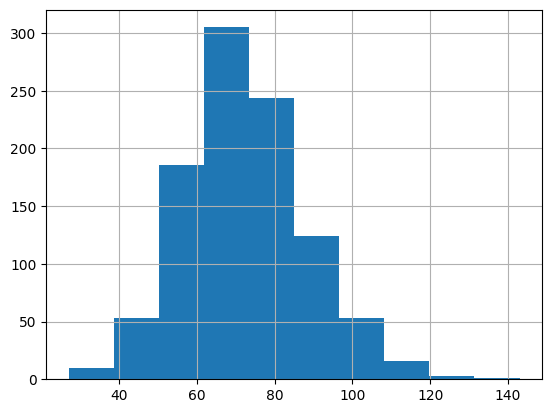

In [ ]:
df['Length']= df['Headline'].str.len()
display('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Length']),min(df['Length']),df['Length'].mean()))
df['Length'].hist()

"Top 10 words from the men and womens' articles' headlines"

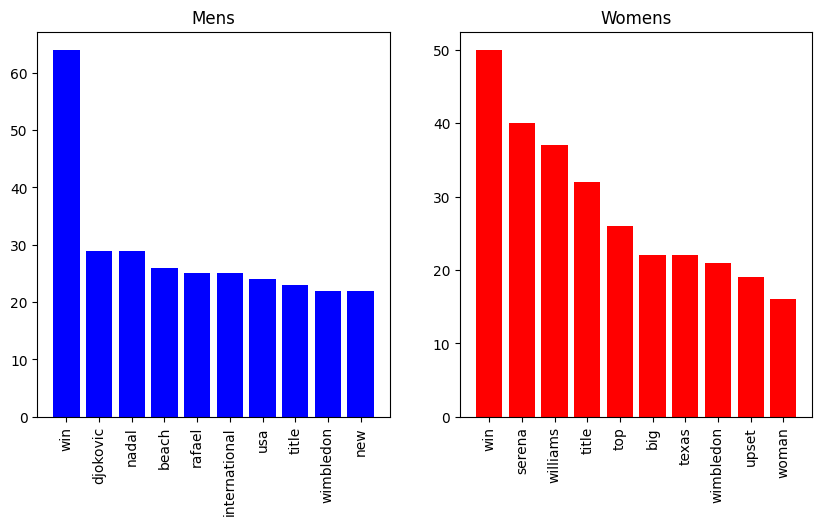

In [ ]:
# Create a term document matrix to see the most common words - stop words were based on this
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
display("Top 10 words from the men and womens' articles' headlines")
# Divide into men and women
df_m = df[df['Sex'] == 'M']
df_f = df[df['Sex'] == 'F']

# Count Vectorizer for men
vect = CountVectorizer()
vects = vect.fit_transform(df_m.updated)

td = pd.DataFrame(vects.todense()).iloc[:533]
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Headline '+str(i) for i in range(len(df_m))]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 10 words for men
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:10]

# Count Vectorizer for women
vect = CountVectorizer()
vects = vect.fit_transform(df_f.updated)

td = pd.DataFrame(vects.todense()).iloc[:462]
td.columns = vect.get_feature_names_out()
term_document_matrix2 = td.T
term_document_matrix2.columns = ['Headline '+str(i) for i in range(len(df_f))]
term_document_matrix2['total_count'] = term_document_matrix2.sum(axis=1)

# Top 10 words for women
term_document_matrix2 = term_document_matrix2.sort_values(by ='total_count',ascending=False)[:10]

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot first graph on the first subplot
axs[0].bar(term_document_matrix['total_count'].index, term_document_matrix['total_count'].values, color='blue')
axs[0].set_title('Mens')
axs[0].tick_params(axis='x', labelrotation=90)

# Plot second graph on the second subplot
axs[1].bar(term_document_matrix2['total_count'].index, term_document_matrix2['total_count'].values, color='red')
axs[1].set_title('Womens')
axs[1].tick_params(axis='x', labelrotation=90)

# Display the figure
plt.show()


In [ ]:
term_document_matrix['total_count']
term_document_matrix2['total_count']

win          50
serena       40
williams     37
title        32
top          26
big          22
texas        22
wimbledon    21
upset        19
woman        16
Name: total_count, dtype: int64

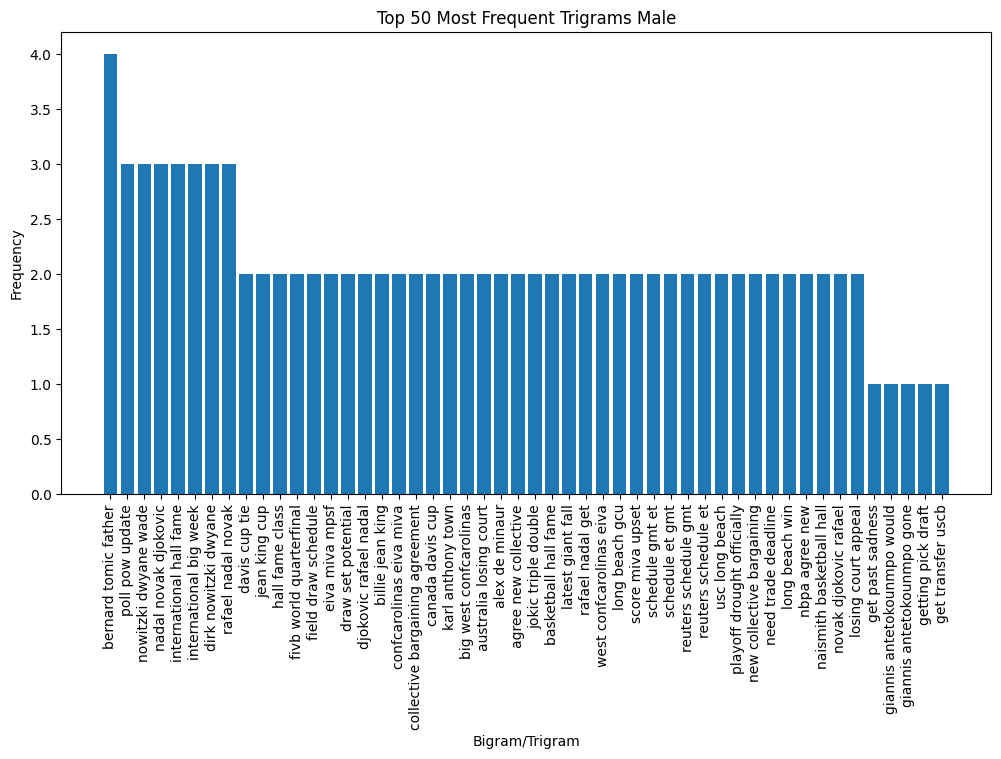

In [ ]:
c_vec = CountVectorizer(ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_m['updated'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
ds_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

# Select the first 100 rows by frequency and sort them in descending order
top_ngrams = ds_ngram.sort_values('frequency', ascending=False).head(50)

# Create the bar chart
plt.figure(figsize=(12,6))
plt.bar(top_ngrams['bigram/trigram'], top_ngrams['frequency'])
plt.xticks(rotation=90)
plt.title('Top 50 Most Frequent Trigrams Male')
plt.xlabel('Bigram/Trigram')
plt.ylabel('Frequency')
plt.show()

Here we can see words like gucci adidas jacket and help harrassed online show up as words that commonly seen together for headlines describing female athletes.

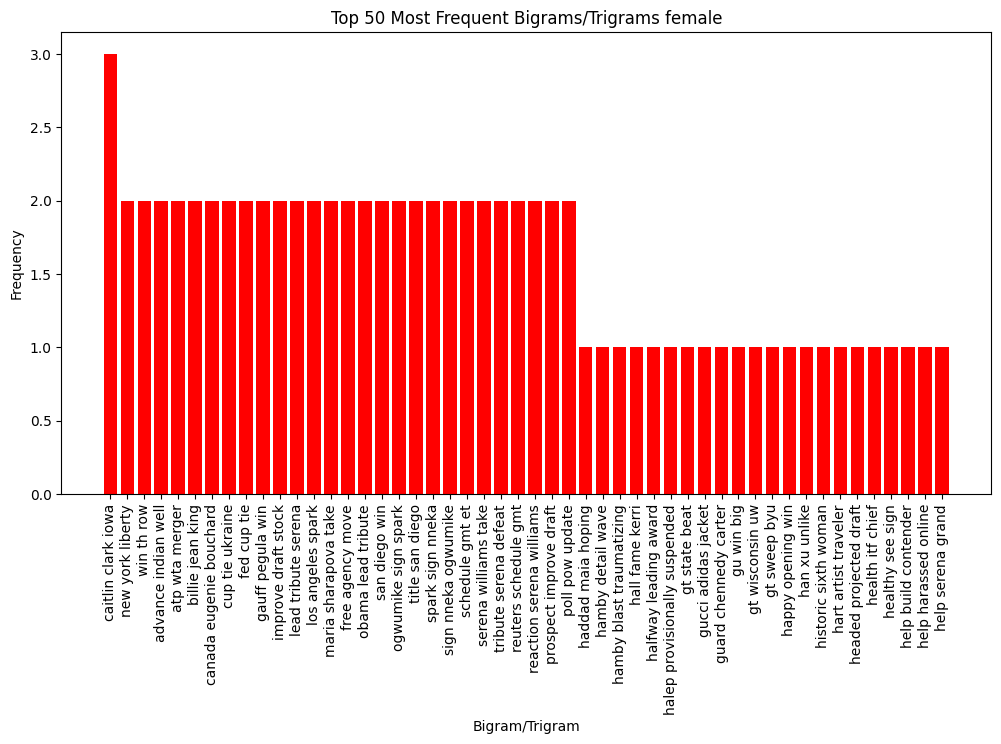

In [ ]:
c_vec = CountVectorizer(ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_f['updated'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
ds_ngram2 = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

# Select the first 100 rows by frequency and sort them in descending order
top_ngrams = ds_ngram2.sort_values('frequency', ascending=False).head(50)

# Create the bar chart
plt.figure(figsize=(12,6))
plt.bar(top_ngrams['bigram/trigram'], top_ngrams['frequency'], color='red')
plt.xticks(rotation=90)
plt.title('Top 50 Most Frequent Bigrams/Trigrams female')
plt.xlabel('Bigram/Trigram')
plt.ylabel('Frequency')
plt.show()


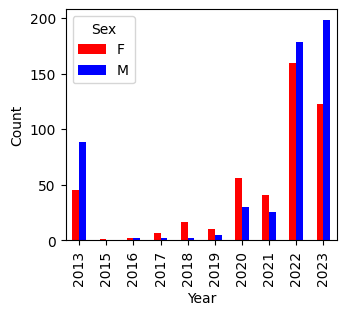

.


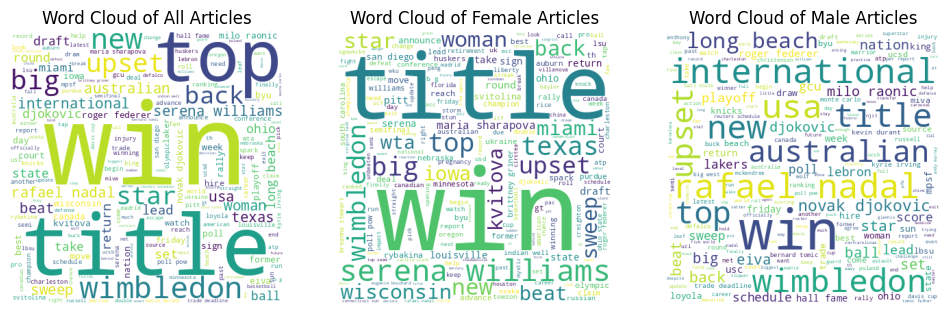

In [ ]:
from wordcloud import WordCloud
#sex vs. date published bar graph
df['Date'] = df['Date'].astype(int)
counts = df.groupby(['Date', 'Sex']).size().unstack(fill_value=0)
ax = counts.plot(kind='bar', color=['red', 'blue'], figsize=(3.5, 3))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.show()
print(".")

#wordcloud for all articles
df['updated'] = df['updated'].fillna('')
all_text = ' '.join(df['updated'])
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(all_text)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(wordcloud)
axs[0].axis('off')
axs[0].set_title('Word Cloud of All Articles')

#wordcloud for female articles
female_articles = df[df['Sex'] == 'F']['updated']
text = ' '.join(female_articles)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
axs[1].imshow(wordcloud)
axs[1].axis('off')
axs[1].set_title('Word Cloud of Female Articles')

#wordcloud for male articles
male_articles = df[df['Sex'] == 'M']['updated']
text = ' '.join(male_articles)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
axs[2].imshow(wordcloud)
axs[2].axis('off')
axs[2].set_title('Word Cloud of Male Articles')

plt.show()





The sum of sentiment scores shows that the articles about men having higher average sentiment - but this can also be due to the fact there are slighly more articles for men in our dataset.

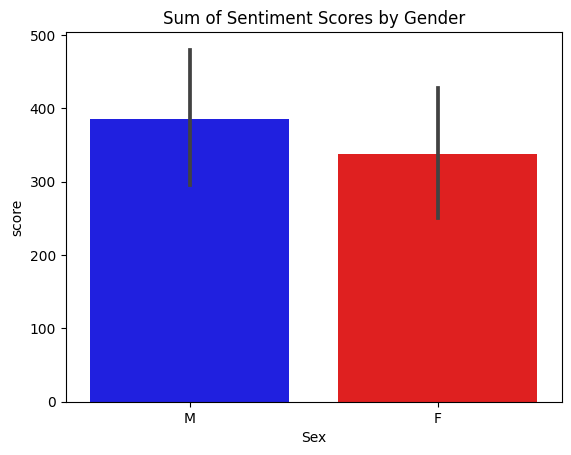

In [ ]:
# Create a DataFrame with columns for sentiment score and gender
import seaborn as sns
data = df[['score', 'Sex']]

colors = {'M': 'blue', 'F': 'red'}
palette = [colors[gender] for gender in df['Sex'].unique()]


# Create a scatter plot with sentiment score on the x-axis and gender on the y-axis
sns.barplot(x='Sex', y='score', data=data, estimator=sum, palette=palette)
plt.title('Sum of Sentiment Scores by Gender')
plt.show()

#Machine Learning

###Machine Learning Models

Due to the time intensive work of manually labelling our data as positive, negative or neutral, we opted to use three pre-trained NLP models. The three pre-trained models we chose are TextBlob, VADER and BERT.

TextBlob is a python library that uses NLTK (Natural Language ToolKit) to gauge the senitment, amoung other things, of text. It gauges the senitment of a sentence based on the words in the NLTK dataset, as it is labeled by poliarity and subjectivity. It then calculates a weighted average of all the words in the sentence to get the final polariaty and subjectivity values.

VADER is an unsupervised learning algorithm, that was originally created to determine the sentiment of text found in social media, like tweets, captions, and comments. The model returns a compound score, which can be used to determine if the text is positive, negative, or neutral. VADER also takes into consideration puncuation marks within the text.

Distilbert-base-uncased-finetuned-sst-2-english is a pretrained model from the Hugging Face transformers library. It has been trained on the sst-2 dataset. This model was chosen over other pre-trained models due to the large amount of data it was trained on. Although the data is not related to sports, the sentences are similar in nature to the headlines we are analyzing (compared to models trained on tweets or product reviews). It is also a smaller and faster version of BERT.



##VADER

VADER, also known as Valence Aware Dictionary for Sentiment Reasoning, is a pre-trained machine learning model that can be used for sentiment analyzer. It was first created to be used on text from social media, such as tweets and comments, and places a particular emphasis on things like emojis, capitalization, and punctuation, however it can be used on larger texts to determine sentiments as well. Vader uses polarity and compound scores to determine sentiment. Polarity is a metric ranging from 0 to 1 that shows the negative, neutral, and positive sentiment of a text. The compound metric takes the polarity scores of positive, negative, and neutral and sums it up and then normalizes it so it equals to 1. The two main parameters we will look at when hypertuning is boost and threshold. Boost is a boolean parameter that determines whether or not to boost the scores above a certain threshold. When boost is set to True, the compound scores that are greater than or equal to the threshold are retained as they are, but the compound scores that are less than the threshold are negated. When boost is set to False, the compound scores are not modified. The default value for boost is set to true. Threshold is a metric ranging from -1 to 1 which corresponds to the compound score that is considered positive/negative. For example, the default value for threshold for Vader is 0.5, which means that if the compound score is above 0.5, it's labelled positive and below -0.5 is considered negative and inbetween is considered neutral.

In [ ]:
df = pd.read_csv('out.csv')
df.head()

#Downloads a collection of words with associated sentiment scores used for sentiment analysis with Vader
nltk.download('vader_lexicon')

#A pre-trained analyzer used to classify text into positive, negative, or neutral sentiments trained on the vader lexicon
sid = SentimentIntensityAnalyzer()

#Mapping sentiment labels to a integer value
label_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}

#Returns polarity scores that includes the positive, negative, and neutral scores for each headline in updated column using the .
#Scores are added as a new column to df with the label 'polarity_scores'.

df['polarity_scores'] = df['updated'].apply(lambda review: sid.polarity_scores(review))

#Assigns a sentiment label of positive,negative, neutral depending on score value

df['label'] = df['score'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))

#Seperates the negative and positive polarity scores from the polarity_scores column and adds it as it's own column

df['neg'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neg'])
df['pos'] = df['polarity_scores'].apply(lambda score_dict: score_dict['pos'])

#Compound scores are calculated using the overall sentiment polarity of the headline and added as a new column

df['compound']  = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])

#Assigns a sentiment label of positive,negative, neutral depending on compound score generated by Vader

df['Vader_label'] = df['compound'].apply(lambda c: 'positive' if c >= 0.5 else ('negative' if c <= -0.5 else 'neutral'))

#Use label mapping to map the sentiment labels of positive,negative,neutral to integer values according to the label_mapping dictionary defined above
#Standardizes both columns and allows for evaluation metrics to be more accurate since the range of the score column in negative infinity to infinity where compound scores range from -1 to 1

df['label'] = df['label'].map(label_mapping)
df['Vader_label'] = df['Vader_label'].map(label_mapping)

# Calculate MSE between the two label columns
mse = mean_squared_error(df['label'], df['Vader_label'])
# Calculate F1 score between the two label columns
f1 = f1_score(df['label'], df['Vader_label'], average='weighted')
# Calculate recall score between the two label columns
recall = recall_score(df['label'], df['Vader_label'], average='weighted')

print('MSE:', mse)
print('F1 score:', f1)
print('Recall:', recall)


MSE: 0.36482412060301506
F1 score: 0.6082713175234769
Recall: 0.6412060301507537


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


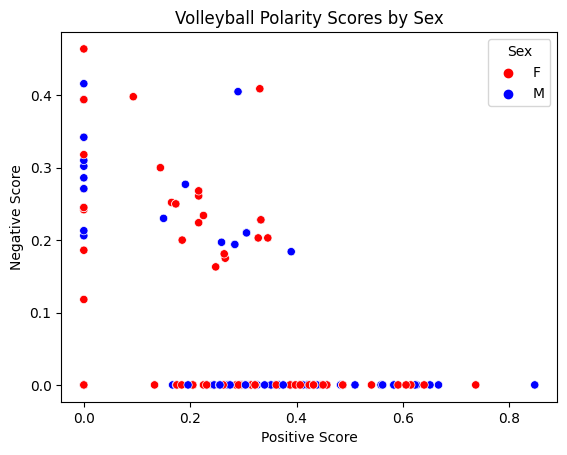

.


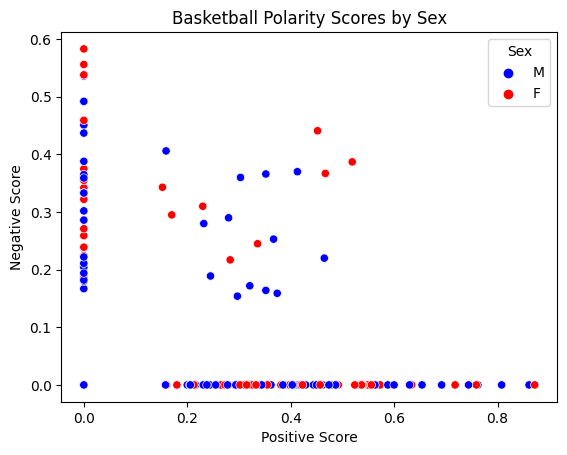

.


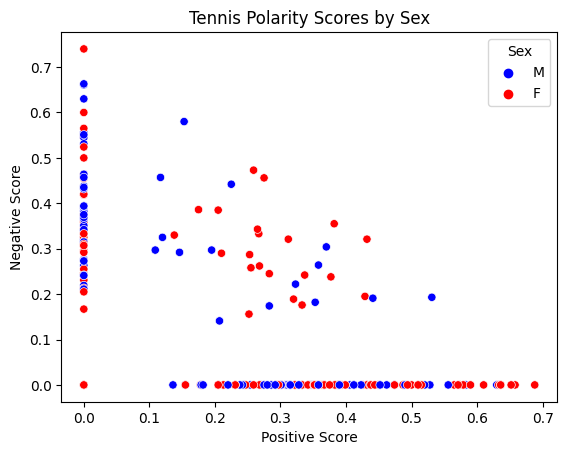

.


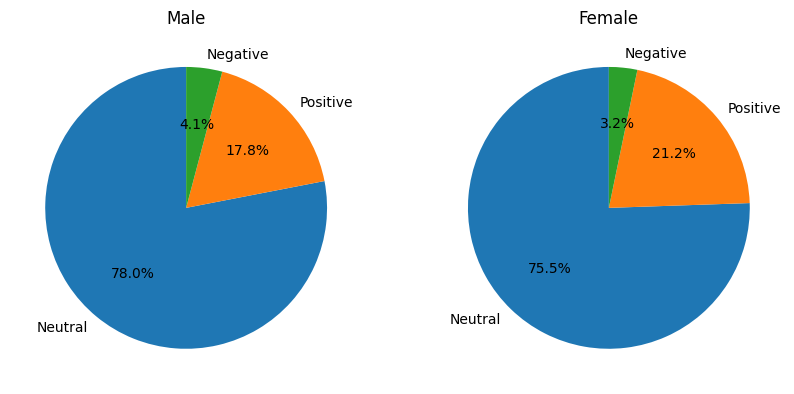

.


In [ ]:
##Visualitzation for Original Vader Results
df.to_csv('vaderOriginal.csv')
df.head()
df['Sport'] = df['Sport'].str.lower()

# Scatterplot for each sport showing polarity scores separated by gender
sports_list = ['volleyball', 'basketball', 'tennis']
df_filtered = df[df['Sport'].isin(sports_list)]
markers = {'M': 'o', 'F': 'o'}
colors = ["blue", "red"]  # set consistent colors for male and female
for sport in sports_list:
    sns.scatterplot(data=df_filtered[df_filtered['Sport'] == sport],
                    x='pos',
                    y='neg',
                    hue='Sex',
                    style='Sex',
                    markers=markers,
                    palette={'M': 'blue', 'F': 'red'})  # use the colors parameter
    plt.title(f"{sport.capitalize()} Polarity Scores by Sex")
    plt.xlabel("Positive Score")
    plt.ylabel("Negative Score")
    plt.show()
    print(".")

# Pie charts for female and male sports categorized by label
male_labels = df[df['Sex'] == 'M']['Vader_label'].value_counts().rename({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})
female_labels = df[df['Sex'] == 'F']['Vader_label'].value_counts().rename({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(male_labels, labels=male_labels.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Male")
ax2.pie(female_labels, labels=female_labels.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Female")
plt.show()
print(".")

In [ ]:
#Hyperparameter tuning, tunes the model using the score column as the true scores and the compound scores as the predicted score

# Define custom estimator
class VaderEstimator(BaseEstimator):

    #Initializes the SentimentIntensityAnalyzer and sets the default attributes
    def __init__(self, boost=True, threshold=0.5):
        self.analyzer = SentimentIntensityAnalyzer()
        self.boost = boost
        self.threshold = threshold

    #Required method for scikit-learn estimators but since we aren't training VaderEstiamtor on data, we don't need it so we return self for the class to function
    def fit(self, X, y=None):
        return self

    #List of texts (X) and return a list of predicted scores (y_pred) for each text. For each text, a polarity score is generates using the sentiment analyzer.
    #The compound score is extracted from the polarity score and is used to determine the predicted score based on the value of the boost and threshold hyperparameters.
    #If the compound score is less than the threshold, the predicted score is equal to -1 times the compound score. If the boost hyperparameter is False, the predicted score is equal to the compound score.
    def predict(self, X):
        y_pred = []
        for text in X:
            vs = self.analyzer.polarity_scores(text)
            compound_score = vs['compound']
            if self.boost:
                if compound_score >= self.threshold:
                    y_pred.append(compound_score)
                else:
                    y_pred.append(-1*compound_score)
            else:
                y_pred.append(compound_score)
        return y_pred

#Input text that will be used to generate sentiment scores
X = df['updated'].tolist()
#True score associated with teh input text
y = df['score'].tolist()

# Split data into training and validation sets of a (30% validation and 70% training)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameters and values to be tested for each hyperparameter
parameters = {
    'threshold': [0.1, 0.5, 0.9],
    'boost': [True, False],
}

# Define evaluation metric
scoring = {'MSE': make_scorer(mean_squared_error, greater_is_better=False)}

#Initialize GridSearchCV object
#refit refers to which metric to use to determine best hyperparameter (looks for lowest MSE value in this case)
#cv refers to number of cross-validation folds
grid_search = GridSearchCV(VaderEstimator(), parameters, scoring=scoring, refit= 'MSE', cv=5)

# Fit GridSearchCV object to training data
grid_search.fit(X_train, y_train)

# Output results
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('results.csv')

#Prints the MSE of the validation set using the best parameters and then prints the best hyperparameters
print("Validation MSE with best hyperparameters: ", mean_squared_error(y_val, grid_search.predict(X_val)), "\n")
print("Best hyperparameters: ", grid_search.best_params_)

#Rerun Vader with the best hyperparameters determined by hypertuning
sid.boost = False

#Returns polarity scores that includes the positive, negative, and neutral scores for each headline in updated column using the .
#Scores are added as a new column to df with the label 'polarity_scores'.
df['polarity_scores'] = df['updated'].apply(lambda review: sid.polarity_scores(review))
#Assigns a sentiment label of positive,negative, neutral depending on score value
df['label'] = df['score'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
#Seperates the negative and positive polarity scores from the polarity_scores column and adds it as it's own column
df['neg'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neg'])
df['pos'] = df['polarity_scores'].apply(lambda score_dict: score_dict['pos'])
#Compound scores are calculated using the overall sentiment polarity of the headline and added as a new column
df['compound']  = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
#Assigns a sentiment label of positive,negative, neutral depending on compound score generated by Vader
df['Vader_label'] = df['compound'].apply(lambda c: 'positive' if c >= 0.1 else ('negative' if c <= -0.1 else 'neutral'))
#Use label mapping to map the sentiment labels of positive,negative,neutral to integer values according to the label_mapping dictionary defined above
#Standardizes both columns and allows for evaluation metrics to be more accurate since the range of the score column in negative infinity to infinity where compound scores range from -1 to 1
df['label'] = df['label'].map(label_mapping)
df['Vader_label'] = df['Vader_label'].map(label_mapping)

df.to_csv('vaderHypertuned.csv')

# Calculate MSE between the two label columns
mse = mean_squared_error(df['label'], df['Vader_label'])
# Calculate F1 score between the two label columns
f1 = f1_score(df['label'], df['Vader_label'], average='weighted')
# Calculate recall score between the two label columns
recall = recall_score(df['label'], df['Vader_label'], average='weighted')

print('MSE:', mse)
print('F1 score:', f1)
print('Recall:', recall)

Validation MSE with best hyperparameters:  3.8432854765217397 

Best hyperparameters:  {'boost': False, 'threshold': 0.1}
MSE: 0.20100502512562815
F1 score: 0.865264267245741
Recall: 0.8653266331658291


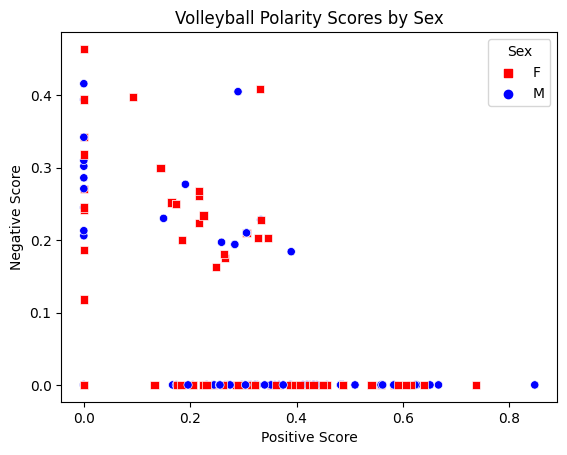

.


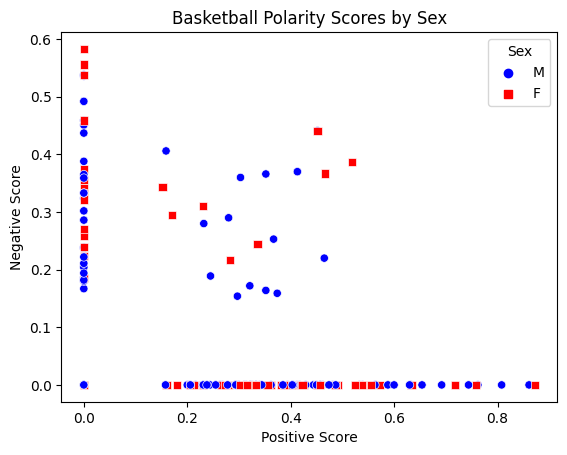

.


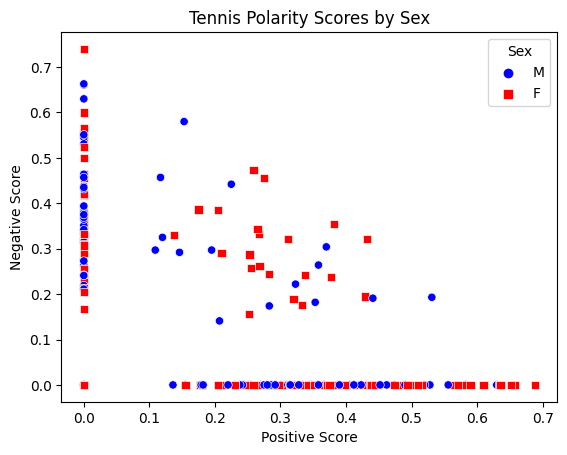

.


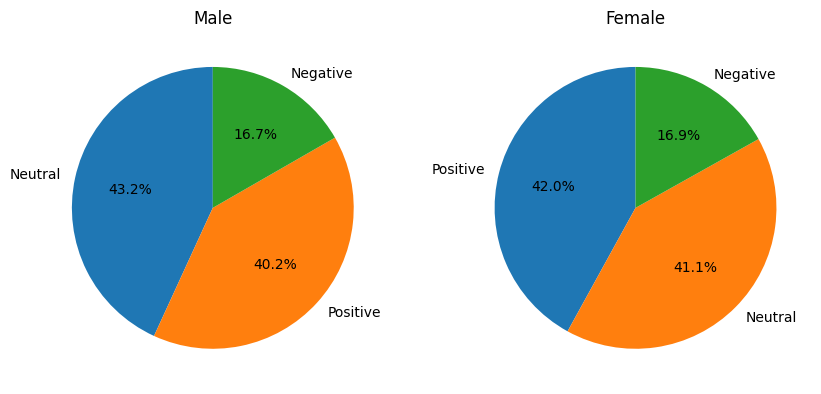

.


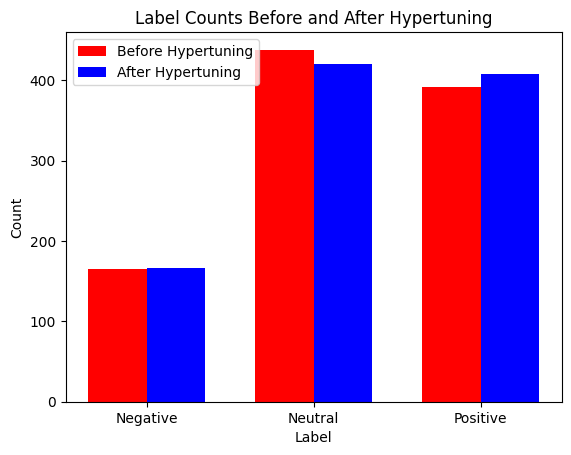

In [ ]:
##Visualitzation for Hypertuned Vader Results

df = pd.read_csv("vaderHypertuned.csv")
df['Sport'] = df['Sport'].str.lower()

# Scatterplot for each sport showing polarity scores separated by gender
sports_list = ['volleyball', 'basketball', 'tennis']
df_filtered = df[df['Sport'].isin(sports_list)]
markers = {'M': 'o', 'F': 's'}
colors = ["blue", "orange"]  # set consistent colors for male and female
for sport in sports_list:
    sns.scatterplot(data=df_filtered[df_filtered['Sport'] == sport],
      x='pos',
      y='neg',
      hue='Sex',
      style='Sex',
      markers=markers,
      palette={'M': 'blue', 'F': 'red'})  # use the colors parameter
    plt.title(f"{sport.capitalize()} Polarity Scores by Sex")
    plt.xlabel("Positive Score")
    plt.ylabel("Negative Score")
    plt.show()
    print(".")

# Pie charts for female and male sports categorized by label
male_labels = df[df['Sex'] == 'M']['Vader_label'].value_counts().rename({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})
female_labels = df[df['Sex'] == 'F']['Vader_label'].value_counts().rename({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(male_labels, labels=male_labels.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Male")
ax2.pie(female_labels, labels=female_labels.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Female")
plt.show()
print(".")

# Create a barplot of before and after hypertuning label counts
df_before = pd.read_csv('vaderOriginal.csv')
df_after = pd.read_csv('vaderHypertuned.csv')
labels = [-1, 0, 1]
label_names = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
counts_before = [df_before['label'].value_counts()[label] for label in labels]
counts_after = [df_after['Vader_label'].value_counts()[label] for label in labels]
x = np.arange(len(labels))
width = 0.35
before_color = 'red'
after_color = 'blue'
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts_before, width, label='Before Hypertuning', color=before_color)
rects2 = ax.bar(x + width/2, counts_after, width, label='After Hypertuning', color=after_color)
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Label Counts Before and After Hypertuning')
ax.set_xticks(x)
ax.set_xticklabels([label_names[label] for label in labels])
ax.legend()
plt.show()

###Results

The original Vader results were evaluated against the score column which is the sum of the sentiment score of each word in the text, gathered from the afinn dataset. We decided to evaluate our models using the score value as it gave the most accurate results in comaprison to the other models.

Since the score was a sum of multiple sentiment scores, the range of the score column can be from negative infinity to infinity, but the Vader compound scores only go from -1 to 1, so to get more accurate evaluations, we decided to convert the scores of both Vader and the original sentiment scores to labels of 'positive','negative', and 'neutral'. For the compound scores, all positive values above the default threshold of 0.5 were considered positive, below -0.5 were negative and everything inbetween was considered neutral. For the original sentiment scores calculated with afinn, any positive value was considered positive, negative values were classified as negative, and 0 was considered to be neutral. We then used label mapping to give the values -1,0,and 1 to negative, neutral and positive sentiments respectively. We then used those integer values for our evaluation metrics.

 When testing the Vader results against the score column, we had a MSE of 0.36482412060301506, F1 score of 0.6082713175234769, and a Recall value of 0.6412060301507537.

We then decided to hypertune the parameters of boost and threshold to see if we can better fit the model and it gave us the best parameters of 0.1 and boost=false. We hypertuned using the MSE as our evaluation metric and the MSE with the best parameters was 3.8432854765217397. This number is significantly larger than the original MSE of 0.36482412060301506, because the MSE calculated during hypertuning uses the original score values which range from negatvie infinity to positive infinity, resulting in a higher MSE.

We then ran the Vader model again with the new parameters and we converted the scores of Vader to -1,0,and 1 depending on the compound value so we can evaluate our model. We ended up getting a MSE value of 0.20100502512562815, F1 score of 0.865264267245741, and Recall value of 0.8653266331658291. As you can tell, the Vader results are much more aligned with the original sentiment scores generated from afinn.

As shown in the graphs, there are slightly less neutral labels, and more positive labels after hypertuning.

As far as the results of the sentiment goes, Vader shows that 16.7% of male articles are negative, comapred to the females 16.9%, and 40.2% of the male articles have a positive sentiment and 42.1% of the female articles have a positive sentiment.

The polarity scores for Tennis show that women tend to have a higher positive polarity score compared to men. The polarity scores for Basketball seem to be relatively similar for women and men in terms of positive and negative polarity scores, however the most negative polarity scores accross all articles seem to be for women articles. As far as volleyball goes, women articles seem to be most prevalent at both extremes of positive and negative polarity scores.

##TextBlob

TextBlob is a python library that is a pretrained machine learning model that can be used for sentiment analysis. It determines the "subjectivity" of text as well as "polarity". By subjectivity, it means that the model returns a float with the range [0.0, 1.0], where 0.0 is the text is objective, and 1.0 is the text is subjective. By polarity, it means that the model will return a float with the range [-1.0, 1.0], where the lower the number is the more negative the text is, and the higher the number is the more positive the text is.

In [ ]:
df = pd.read_csv("out.csv")

#creates a function to loop through
def getCell(cell):
  blob = TextBlob(cell)
  sentiment = blob.sentiment
  #returns the subjectivity and polarity of the article (blob)
  return pd.Series([sentiment.subjectivity, sentiment.polarity])

label_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}

#creates two new columns for the subjectivity and polarity
df[['Subjectivity', 'Polarity']] = df['updated'].apply(getCell)
df['label'] = df['score'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
df['textblob_label'] = df['Polarity'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
df['label'] = df['label'].map(label_mapping)
df['textblob_label'] = df['textblob_label'].map(label_mapping)


# Calculate MSE between the two label columns
mse = mean_squared_error(df['label'], df['textblob_label'])
# Calculate F1 score between the two label columns
f1 = f1_score(df['label'], df['textblob_label'], average='weighted')
# Calculate recall score between the two label columns
recall = recall_score(df['label'], df['textblob_label'], average='weighted')

print('MSE:', mse)
print('F1 score:', f1)
print('Recall:', recall)

# Calculate MSE between the two label columns
mse = mean_squared_error(df['label'], df['textblob_label'])

print('MSE:', mse)
##Visualitzation for Vader Results
df.to_csv('textBlob output.csv')
df.head(5)

MSE: 0.4964824120603015
F1 score: 0.6066941778944679
Recall: 0.6120603015075377
MSE: 0.4964824120603015


,Date,Source,Headline,Sport,Sex,updated,score,Subjectivity,Polarity,label,textblob_label
0,2023,SBNation,"Blazers Sign Jeenathan Williams, Waive Ryan Ar...",Basketball,M,blazer sign jeenathan williams waive ryan arci...,0,0.0,0.0,0,0
1,2022,ESPN,Sources: Karl-Anthony Towns out 4-6 weeks with...,Basketball,M,source karl anthony town week calf strain,0,0.0,0.0,0,0
2,2023,ESPN,"Jameer Nelson Jr., son of ex-NBA guard, transf...",Basketball,M,jameer nelson jr son ex guard transferring tcu,0,0.0,0.0,0,0
3,2022,VollyBall mag,"NCAA volleyball: Pepperdine upsets Baylor, mas...",Volleyball,F,upset baylor massive friday slate tap,-2,1.0,0.0,-1,0
4,2019,PMN Sports,"Gimelstob resigns from ATP board, week after c...",Tennis,M,gimelstob resigns atp board week case sentencing,-3,0.0,0.0,-1,0


.


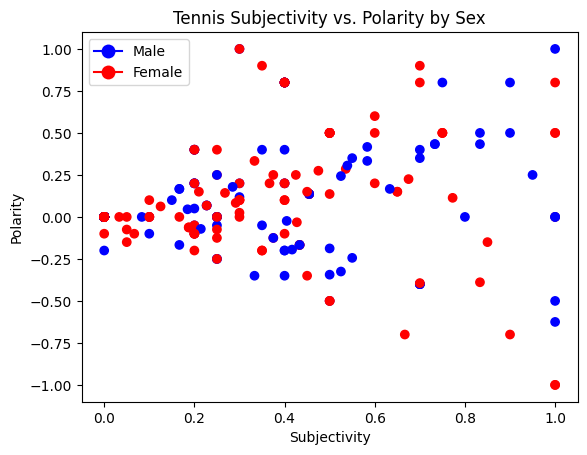

.


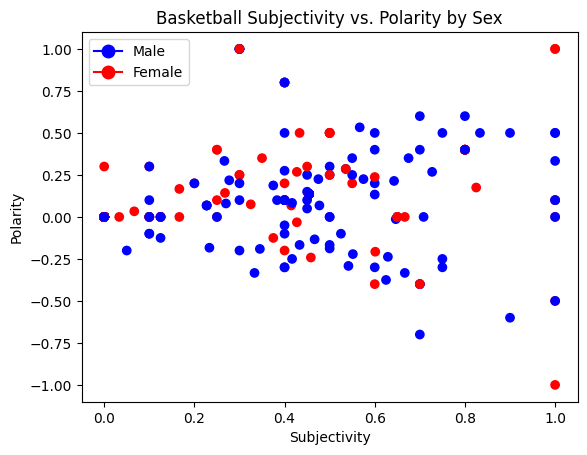

.


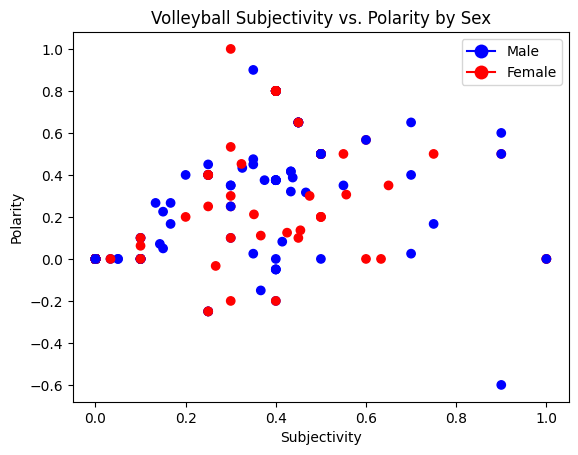

.


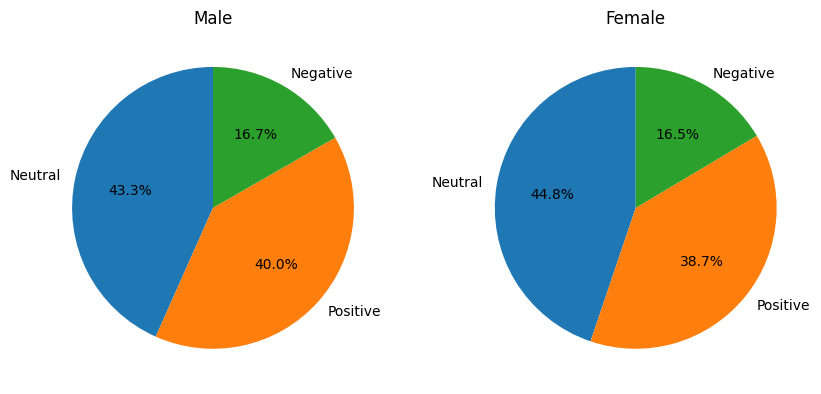

.


In [ ]:
df = pd.read_csv("textBlob output.csv")
df['Sport'] = df['Sport'].str.lower()
male_data = df[df['Sex'] == 'M']
female_data = df[df['Sex'] == 'F']

print(".")
#Scatter Plot for Tennis
tennis_df = df[df['Sport'] == 'tennis']
plt.scatter(tennis_df['Subjectivity'], tennis_df['Polarity'], c=tennis_df['Sex'].map({'M': 'blue', 'F': 'red'}))
blue_patch = plt.plot([],[], marker="o", markersize=10, mec="none", color='b', label='Male')[0]
red_patch = plt.plot([],[], marker="o", markersize=10, mec="none", color='r', label='Female')[0]
plt.legend(handles=[blue_patch, red_patch])
plt.title('Tennis Subjectivity vs. Polarity by Sex')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.show()
print(".")

#Scatter Plot for Basketball
basketball_df = df[df['Sport'] == 'basketball']
plt.scatter(basketball_df['Subjectivity'], basketball_df['Polarity'], c=basketball_df['Sex'].map({'M': 'blue', 'F': 'red'}))
blue_patch = plt.plot([],[], marker="o", markersize=10, mec="none", color='b', label='Male')[0]
red_patch = plt.plot([],[], marker="o", markersize=10, mec="none", color='r', label='Female')[0]
plt.legend(handles=[blue_patch, red_patch])
plt.title('Basketball Subjectivity vs. Polarity by Sex')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.show()
print(".")

#Scatter Plot for Volleyball
tennis_df = df[df['Sport'] == 'volleyball']
plt.scatter(tennis_df['Subjectivity'], tennis_df['Polarity'], c=tennis_df['Sex'].map({'M': 'blue', 'F': 'red'}))
blue_patch = plt.plot([],[], marker="o", markersize=10, mec="none", color='b', label='Male')[0]
red_patch = plt.plot([],[], marker="o", markersize=10, mec="none", color='r', label='Female')[0]
plt.legend(handles=[blue_patch, red_patch])
plt.title('Volleyball Subjectivity vs. Polarity by Sex')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.show()
print(".")

# Pie charts for female and male sports categorized by label
male_labels = df[df['Sex'] == 'M']['label'].value_counts().rename({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})
female_labels = df[df['Sex'] == 'F']['label'].value_counts().rename({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(male_labels, labels=male_labels.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Male")
ax2.pie(female_labels, labels=female_labels.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Female")
plt.show()
print(".")



###Results

As mentioned previously, TextBlob uses two metrics that can be used for sentiment analysis. Polarity, a value between -1.0 and 1.0 (inclusive) which represents the positive (1.0) and negative (-1.0) sentiment of the text. TextBlob also uses a metric called subjectivity, a value between 0.0 and 1.0, which represents if the text is objective (0.0) or subjective (1.0).

Interestingly, when subjectivity vs. polarity were graphed according to male/female using our three main sports, there was not a clear distinction in most of the graphs as to which was more or less polarized or subjective. It was noticed in the Basketball graph, that more of the female points were on the lower side of the subjectivity scale, meaning the headlines were more objective then the male headlines. The volleyball graph, when compared to the other two sports scatter plots, seemed to have the most sprawl of points within polarity and subjectivity.

We used the polarity scores to determine the positive, neutral, or negative sentiment of the headlines by assigning a polarity value of 0 to neutral, a value of (0,1] as positive, and a value of [-1,0) as negative. When creating a pie graph of our results separated by male/female, we concluded that there was only slight differences between the two charts. Female headlines had a negative sentiment of 16.5%, whereas male headlines had a negative sentiment 16.7% of the time. Even though female headlines had less negative sentiment then male headlines, they had less positive headlines, with a percent of 38.7% with male headlines having 40% positivity rate. Headlines that were about female athletes had a higher neutral percentage of 44.8%, with male headlines being at 43.3%.

To compare the results of TextBlob and test their accuracy, we have compared them to the sentiment scores calculated with afinn, in a similar manner to the VADER scores. When testing the TextBlob results to this score column, we had an MSE of 0.4964824120603015, a F1 score of 0.6066941778944679, and a Recall value of 0.6120603015075377.


##Bert
The distilbert-base-uncased-finetuned-sst-2-english is a pretrained model from the Hugging Face transformers library. It has been trained on the sst-2 dataset. This model was chosen over other pre-trained models due to the large amount of data it was trained on. Although the data is not related to sports, the sentences are similar in nature to the headlines we are analyzing (compared to models trained on tweets or product reviews). It is also a smaller and faster version of BERT.

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datetime import datetime as dt
data = pd.read_csv('out.csv')
# Normalize the score so that it aligns with the scores produced by BERT
data['score'] = np.where(data['score'] < 0, -1, np.where(data['score'] == 0, 0, 1))

start = dt.now()

#Load pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

bertScore = []
for i in range(0, len(data)):
  text = data['updated'][i]

  encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

  #Run input text through model for sentiment analysis
  output = model(**encoded_text)
  predicted_class = output.logits.argmax().item()

  # Assign score based on predicted class
  if predicted_class == 0:
      bertScore.append(-1)
  elif predicted_class == 1:
      bertScore.append(1)
  elif predicted_class == 2:
      bertScore.append(0)
  else:
      print('no score')

data['Bert Score'] = bertScore
# Run-time
running_secs = (dt.now() - start).seconds
display('The number of seconds it takes to run the model: ' + str(running_secs) + '')

'The number of seconds it takes to run the model: 103'

Because the purpose of our project was to find the sentiment of news headlines in sports and compare the differences between headlines attached to male vs female athletes, we did not have a pre-defined dataset with setniment already classified. This made it difficult to hypertune the parameters as we did not have a measure for optimal performance or accuracy. Thus, we used the "scores" generated by the sentiment lexicon (discussed in the EDA section). The scores were normalized according to the output our transformer uses, and scores were compared to see if they were similar. We chose to not train our model on the sentiment lexicon, as it is not entirely accurate. For example, they cannot catch negation (e.g. not terrible, would be classified as negative) and it is not able to capture the context of the sentence. Instead we use the scores generated from the sentiment lexicon as a benchmark to help compare outputs generated from our sentiment analysis models.

Here is an attempt to optimize some parameters of the model based on findings found online. Because we did not want to fit the model on the results provided by the sentiment lexicon, this part was tricky (as there was no value to measure improvement).

Learning rate is a parameter that determines the step size at each iteration. Because we have a smaller dataset, a lower learning rate was chosen because it is harder to learn complex patterns, therefore a slower learning rate is preferred.

Weight decay helos reduce the complexity and prevents overfitting. Because the model has been pretrained on a large amount of data, we weren't too worried about it overfitting on our data. The higher the value is the less likely the model overfits.

Hyper tuning BERT


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from datetime import datetime as dt

start = dt.now()

# Load pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

#Use an optimizer - AdamW
optimizer = AdamW(
    model.parameters(),
    lr=1e-5,
    weight_decay=0.01,
    eps=1e-8
)

bertScore = []

for i in range(0, len(data)):
  text = data['updated'][i]
  encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
  output = model(**encoded_text)
  predicted_class = output.logits.argmax().item()

  # Assign score based on predicted class
  if predicted_class == 0:
      bertScore.append(-1)
  elif predicted_class == 1:
      bertScore.append(1)
  elif predicted_class == 2:
      bertScore.append(0)
  else:
      print('no score')

  loss = output.loss
  optimizer.step()
  optimizer.zero_grad()

data['Bert Score Optimized'] = bertScore

running_secs = (dt.now() - start).seconds
display('The number of seconds it takes to run the model: ' + str(running_secs) + '')
data.to_csv('BERT.csv')

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


'The number of seconds it takes to run the model: 71'

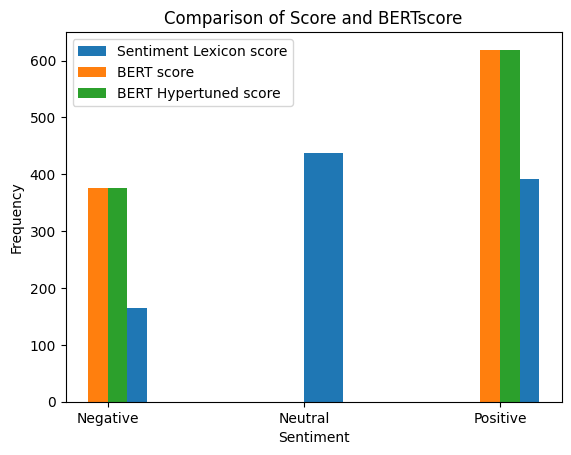

In [ ]:
# Compare the sentiment lexicon score, BERT score and the hypertuned BERT score

score_freq = data['score'].value_counts().sort_index()
Bscore_freq = data['Bert Score'].value_counts().sort_index()
Bscore_freq.loc[0] = 0
BUscore_freq = data['Bert Score Optimized'].value_counts().sort_index()
BUscore_freq.loc[0] = 0

# Set the x-axis labels
labels = ['Negative', 'Neutral', 'Positive']

# Set the x and y-axis data for the plot
x = [0, 1, 2]
y1 = [score_freq[-1], score_freq[0], score_freq[1]]
y2 = [Bscore_freq[-1], Bscore_freq[0], Bscore_freq[1]]
y3 = [BUscore_freq[-1], BUscore_freq[0], BUscore_freq[1]]
y2 =  np.array(y2,  dtype=object)
y3 =  np.array(y3,  dtype=object)

# Create a grouped bar chart
fig, ax = plt.subplots()
ax.bar(x, y1, width=0.2, align='edge', label='Sentiment Lexicon score')
ax.bar(x, y2, width=-0.1, align='edge', label='BERT score')
ax.bar(x, y3, width=0.1, align='edge', label='BERT Hypertuned score')

# Add axis labels and title
ax.set_xlabel('Sentiment')
ax.set_ylabel('Frequency')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Comparison of Score and BERTscore')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Here we can see that the hypertuned model did not make an impact on the scores.

Distribution of Results

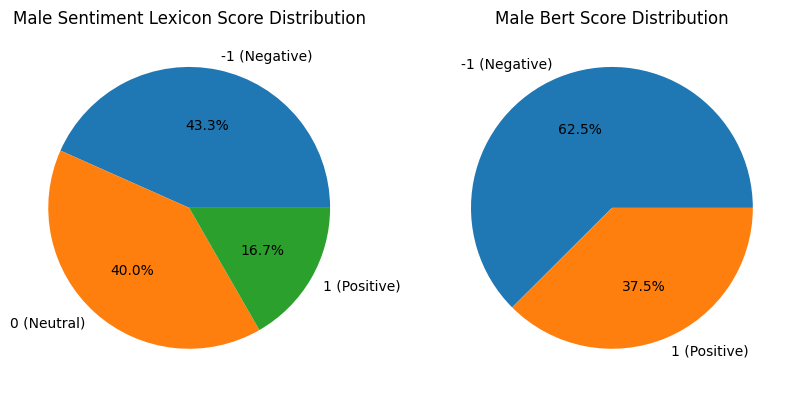

In [ ]:
# Filter data by gender
male_data = data[data['Sex'] == 'M']

# Create subplots for each pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Convert frequency counts to labels
score_labels = ['-1 (Negative)', '0 (Neutral)', '1 (Positive)']
bscore_labels = ['-1 (Negative)', '1 (Positive)']
# Plot pie chart for 'Score'
male_score_freq = male_data['score'].value_counts()
ax1.pie(male_score_freq, labels=score_labels, autopct='%1.1f%%')
ax1.set_title('Male - Score')

# Plot pie chart for 'Bert Score'
male_bscore_freq = male_data['Bert Score'].value_counts()
ax2.pie(male_bscore_freq, labels=bscore_labels, autopct='%1.1f%%')
ax2.set_title('Male - Bert Score')

# Set chart titles
ax1.set_title('Male Sentiment Lexicon Score Distribution')
ax2.set_title('Male Bert Score Distribution')
# Show the plot
plt.show()

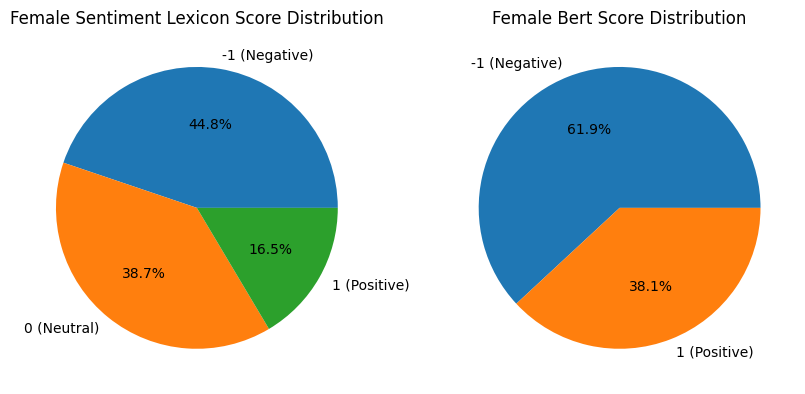

In [ ]:
female_data = data[data['Sex'] == 'F']

# Create subplots for each pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Convert frequency counts to labels
score_labels = ['-1 (Negative)', '0 (Neutral)', '1 (Positive)']
bscore_labels = ['-1 (Negative)', '1 (Positive)']
# Plot pie chart for 'Score'
female_score_freq = female_data['score'].value_counts()
ax1.pie(female_score_freq, labels=score_labels, autopct='%1.1f%%')
ax1.set_title('Female - Score')

# Plot pie chart for 'Bert Score'
female_bscore_freq = female_data['Bert Score'].value_counts()
ax2.pie(female_bscore_freq, labels=bscore_labels, autopct='%1.1f%%')
ax2.set_title('Female - Bert Score')

# Set chart titles
ax1.set_title('Female Sentiment Lexicon Score Distribution')
ax2.set_title('Female Bert Score Distribution')
# Show the plot
plt.show()

###Results
Based on the results provided by this pretrained BERT model, it seems like the distribution of positive and negative sentiment for men and women is very similar. Compared to the sentiment lexicon score, there were more sentiments in the negative category. This may also be due to the fact there is not a neutral category present for BERT. Suprising results were that more of the headlines were grouped into negative. In our EDA, we did not find many words that were inherently negative, so having most of the data being classified as negative for both men and women was surprising. We were also expecting that the women's articles to have greater negative sentiment but it was actually slightly lower than the mens.

#Conclusions

##Findings

Our findings indicate that the difference in sentiment for articles describing female and male athletes is negligible. The results from Textblob mirrored the scores that were produced by the sentiment lexicon, showing that around 43% of headlines were negative, 40% were neutral and 17% were positive for both men and women. The results from VADER showed that there was more neutral articles associated with male athletes and more positive and negative articles associated with female athletes. The results from the pre-trained BERT model showed that more than 60% of the data was deemed negative, much higher than our three other ways to score the sentiments.

When parsing through the articles ourselves, the women's articles seemed to have more of a focus on the athlete's clothes and personal life compared to the male articles. However, despite expecting a negative sentiment for female articles, we are not too surprised as Vader and Textblob were not trained specifically on Sports articles so it was expected that the models wouldn't be able to accurately label them. In the realm of sports, words like 'bikini' or 'wear' are considered negative due to the connation it has and the lack of relevance it has to a player or team's performance. Words like that wouldn't be flagged as negative when using Vader or Textblob, causing our results to be skewed towards a positive sentiment, despite the actual sentiment being closer to negative.

We determined that we would need to use other supervised leaning models in order to train our modles to pick up on the sentiment that we were attributing to certain words in our minds. Instead of dealing with jsut positive or negative sentiment our modles would have provided conslusive results when trained with sexist vs neutral words.





##Applications

Given our articles were all from the last ten years, it shows that certain subsets of sports media is not more positive towards men or women. One thing we noticed when collecting data was that it was much harder to find enough data for womens' sports compared to men. For example, from one our sources (FiveThirtyEight), there were only WNBA articles from 2019, compared to the NBA which had articles dated back to 2014.

Applications to the real world is that this research could be conducted on larger sets of data and with more accurate models to come to more conclusive results. Further exploration would include social media exploration to understand the discourse around womens' sports and why there is less of an interest in sports media for women. Based on this information, sports companies can make smarter, targeted ads that would help their marketing strategies to bring more people to womens' sports. This could also encourage young women to start or continue with sports, which has many benifits, such as a healthier lifestyle and greater sense of community.

Another intesting application would be to investigate if these findings are how people actually percive women vs men portrayed in the media. For example, perhaps there is one headline that goes viral and has a much more negative sentiment towards women in sports, as opposed to all headlines having the same sentiment as mens, and same view time. More research could be done into this, and how the sentiment of headlines may contribute to their success in the press.

Overall, there are many applications of this report, and we hope that more study and work will be done in this field, to gather more information and data towards the sentiment of how men vs women are portrayed in sports.

##What We Learned

We were surprised with the challeges of collecting sufficient and useful data for our machine learning model. It took quite a long time to locate and scrape the data that we wanted to, and after cleaning the data we needed to go retrieve even more to finish our project. We also were reminded of the importance of the quality of the data, as it has large implications of the quality and accuracy of the results.

We also learned the difficulty of tuning a model. There are many variables and many options, and these values all depend various factors related to the data and what the model is answering. Runtime complexity is also another issue, we had to be mindful of. A lot of code was taking too long to run with the analysis of sports articles so we had to pivot to using sports headlines only.

##Next Steps

For the next steps in our investigation, we would first collect even more data to use for the models. This could include more sports, such as football, hockey, and golf. This could allow for different conclusions to be drawn from the model. We could also consider retriving more articles from a larger time period for our models for further next steps. Most of the articles we retrived were written in the past three years, so getting older articles could offer additional comentary on the sentiment towards male and female athletes.

Next steps include choosing one optimal model to train our data on. And further hypertuning and validating those results to generate better results.

#Bibliography

>Shor, E., van de Rijt, A., Miltsov, A., Kulkarni, V., & Skiena, S. (2015). A Paper Ceiling: Explaining the Persistent Underrepresentation of Women in Printed News. American Sociological Review, 80(5), 960–984. http://www.jstor.org/stable/24756352

>Yang, E. C. L., Hayes, M., Chen, J., Riot, C., & Khoo-Lattimore, C. (2020). A social media analysis of the gendered representations of female and male athletes during the 2018 commonwealth games. International Journal of Sport Communication, 13(4), 670-695. doi:10.1123/IJSC.2020-0045

>Ayhan, B., & Demir, Y. (2022). Systematic Sexism: Women’s Sports News in a Circle of Gatekeepers and Users on Twitter. Communication & Sport, 0(0). https://doi-org.proxy.lib.uwaterloo.ca/10.1177/21674795221147644

>Brownlee, Jason. “Naive Bayes for Machine Learning.” MachineLearningMastery.com, 14 Aug. 2020, https://machinelearningmastery.com/naive-bayes-for-machine-learning/.

>behrens, et al. “Naïve Bayes Theorem for Multiple Features.” Cross Validated, 1 Jan. 1965, https://stats.stackexchange.com/questions/323530/na%c3%afve-bayes-theorem-for-multiple-features#:~:text=Na%C3%AFve%20Bayes%20Theorem%20for%20multiple%20features%201%20Day,%7C%20weak%5D%206%20Play%20is%20%5Byes%20%7C%20no%5D.

>TextBlob: Simplified Text Processing — TextBlob 0.16.0 documentation, https://textblob.readthedocs.io/en/dev/. Accessed 3 April 2023.

>Beri, Aditya. “SENTIMENTAL ANALYSIS USING VADER. interpretation and classification of… | by Aditya Beri.” Towards Data Science, 27 May 2020, https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664. Accessed 3 April 2023.

>https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english

>Yang, Sophia. “Text Analysis Basics in Python.” Medium, Towards Data Science, 6 Nov. 2020, https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5.